# Introduction

In [43]:
library(ggplot2) 
library(repr)

options(repr.plot.width=4, repr.plot.height=2)

# Non-imaginary roots WS 1.1
$y_t = 0.2y_{t-1}+0.35y_{t-2}$

In [29]:
a1 <- 0.2
a2 <- 0.35
d <- a1^2 + 4*a2
d

[1] 1.44

In [30]:
0.5*(a1+d^0.5)
0.5*(a1-d^0.5)

[1] 0.7

[1] -0.5

Den homogene løsning er derfor:

$A_1(0.7)^t + A_2(-0.5)^t$

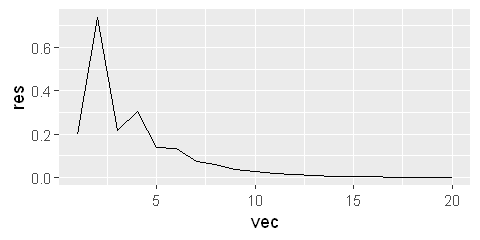

In [31]:
vec <- 1:20
res <- (0.7)^vec + (-0.5)^vec

ggplot() + 
    geom_line(aes(vec,res))

Et ekstra eksempel (som ikke er stationært)

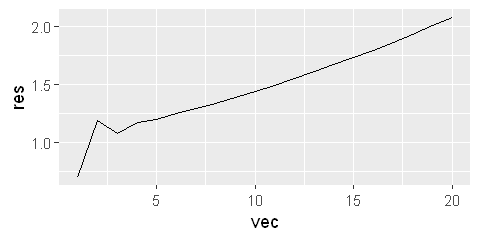

In [32]:
a1 <- 0.7
a2 <- 0.35
d <- a1^2 + 4*a2
alfa1 <- 0.5*(a1+d^0.5)
alfa2 <- 0.5*(a1-d^0.5)

vec <- 1:20
res <- (alfa1)^vec + (alfa2)^vec

ggplot() + 
    geom_line(aes(vec,res))

# Imagninary roots WS 1.2
$y_t = 1.6y_{t-1}-0.9y_{t-2}$

In [33]:
a1 <- 1.6
a2 <- -0.9

d <- a1^2+4*a2
d

[1] -1.04

In [34]:
0.5*(a1+as.complex(d)^0.5)
0.5*(a1-as.complex(d)^0.5)

[1] 0.8+0.509902i

[1] 0.8-0.509902i

In [38]:
sqrt(0.8^2 + 0.509901951359278^2)
sqrt(0.9)

[1] 0.9486833

[1] 0.9486833

In [39]:
r <- (-a2)^0.5
r

[1] 0.9486833

In [40]:
theta <- acos(a1/(2*(-a2)^0.5))
theta

[1] 0.5674505

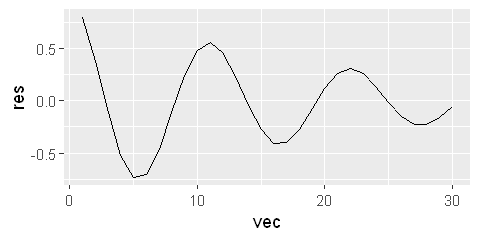

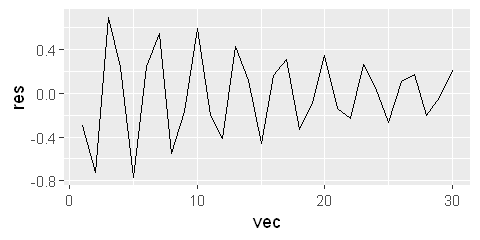

In [41]:
vec <- 1:30
res <- 1*(r)^vec*cos(theta*vec+0)

ggplot() + 
    geom_line(aes(vec,res))

vec <- 1:30
res <- 1*(0.949)^vec*cos(1.89*vec+0)

ggplot() + 
    geom_line(aes(vec,res))

# Coefficients of the ARMA(2,1) process WS 2.1

$y_t = 1.6y_{t-1}-0.9y_{t-2} + \varepsilon_1 + 0.5\varepsilon_{t-1}$

Vi kan anvende tallene r og theta fra forrige WS da tallene er ens

In [ ]:
theta
r

In [ ]:
b1 <- 2.739
b2 <- -1.197

round(cos(b2)-(r/2.1)*cos(theta+b2), 3)

vec <- 0:50
res <- b1*0.949^vec*cos(0.567*vec+b2)
a   <- 2.739*0.949^vec*cos(0.567*vec-1.197)
ggplot() + 
    geom_line(aes(vec,res))

In [ ]:
ktk <- c(1,2.1)

for (i in 3:50) {
    ktk[i] <- 1.6*ktk[i-1]-0.9*ktk[i-2] 
}

ggplot() + 
    geom_line(aes(0:49, ktk))

# Spurious regression WS 4.1
$a+b$

In [36]:
n <- 1000
x <- c(1:n)

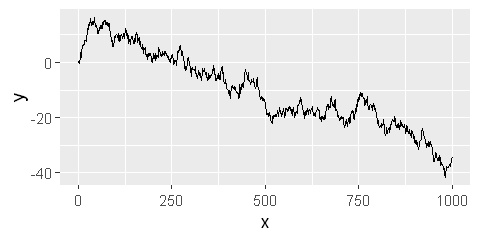

In [20]:
set.seed(4)
y <- cumsum(rnorm(n))

data <- data.frame(x, y)

ggplot() + 
    geom_line(data=data, aes(x, y))

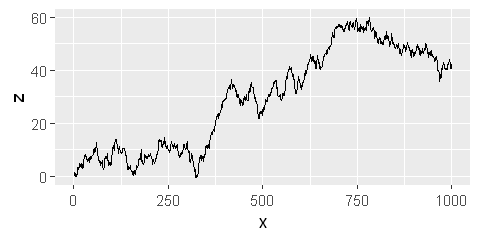

In [22]:
set.seed(16)

data$z <- cumsum(rnorm(n))

ggplot() + 
    geom_line(data=data, aes(x, z))

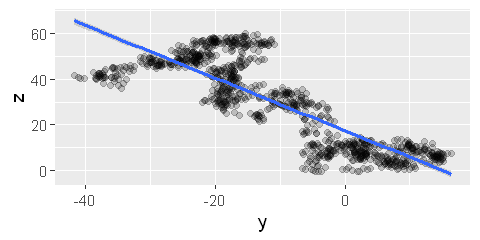

In [23]:
ggplot(data, aes(y,z)) + 
    geom_point(alpha=0.2) + 
    geom_smooth(method = "lm")

In [25]:
reg <- lm(y ~ z, data=data)
summary(reg)


Call:
lm(formula = y ~ z, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.0005  -4.3668   0.3076   4.8037  16.1560 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.55514    0.43753   17.27   <2e-16 ***
z           -0.60891    0.01256  -48.49   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.445 on 998 degrees of freedom
Multiple R-squared:  0.7021,	Adjusted R-squared:  0.7018 
F-statistic:  2352 on 1 and 998 DF,  p-value: < 2.2e-16


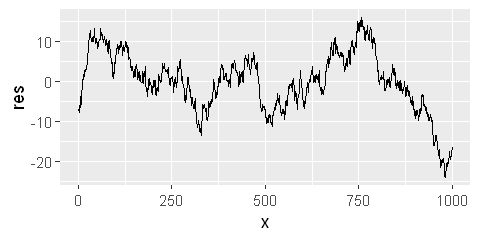

In [27]:
 
data$res <- resid(reg)

ggplot() + 
    geom_line(data=data, aes(x, res))

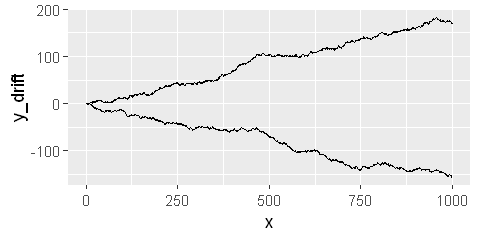

In [48]:
y_drift <- cumsum(rnorm(n)+0.2)
z_drift <- cumsum(rnorm(n)-0.1)

data$y_drift <- y_drift
data$z_drift <- z_drift

ggplot() + 
    geom_line(data=data, aes(x, y_drift)) + 
    geom_line(data=data, aes(x, z_drift))

In [49]:
reg_drift <- lm(y_drift ~ z_drift)
summary(reg_drift)


Call:
lm(formula = y_drift ~ z_drift)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.179  -9.458  -3.255   5.863  49.535 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -4.551929   0.905864   -5.025 5.96e-07 ***
z_drift     -1.146980   0.009732 -117.857  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.17 on 998 degrees of freedom
Multiple R-squared:  0.933,	Adjusted R-squared:  0.9329 
F-statistic: 1.389e+04 on 1 and 998 DF,  p-value: < 2.2e-16


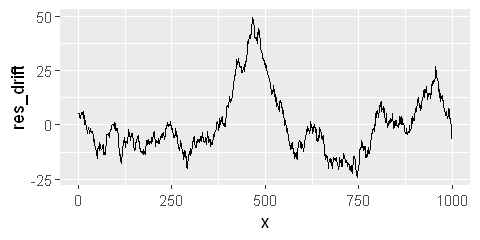

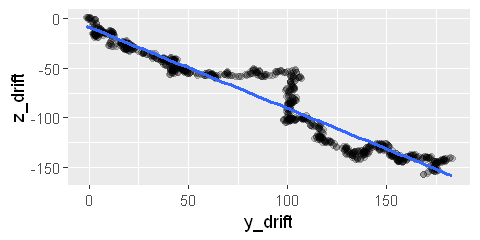

In [50]:
res_drift <- resid(reg_drift)
data$res_drift <- res_drift

ggplot() + 
    geom_line(data=data, aes(x, res_drift))

ggplot(data, aes(y_drift,z_drift)) + 
    geom_point(alpha=0.2) + 
    geom_smooth(method = "lm")

In [51]:
head(data)

x,y,z,res,y_drift,z_drift,res_drift
1,0.2167549,0.2588229,1.867557,0.003797725,0.4051713,5.020450
2,-0.3257377,2.0899436,2.583552,0.798830740,-0.2233842,5.094542
3,0.5654069,1.7503250,3.241285,-0.610051568,-0.6632702,3.181119
4,1.1613875,2.6475232,4.453890,-0.368816494,-0.9964623,3.040190
5,2.7970055,3.1355395,6.424910,-1.420207938,0.3957419,3.585629
6,3.4862810,1.8801536,6.251387,-1.087685576,0.4292664,3.956603


In [44]:

z_1 <- diff(data$z)

a <- ggplot() + 
   geom_line(aes(x[-1], z_1))

y_1 <- diff(data$y)

b <- ggplot() + 
   geom_line(aes(x[-1], y_1))

ERROR: Error in grid.arrange(a, b): could not find function "grid.arrange"



Call:
lm(formula = y_1 ~ z_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7396 -0.6328 -0.0077  0.6642  3.2302 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.03606    0.03071  -1.174    0.241
z_1          0.03313    0.03139   1.055    0.292

Residual standard error: 0.9697 on 997 degrees of freedom
Multiple R-squared:  0.001116,	Adjusted R-squared:  0.0001139 
F-statistic: 1.114 on 1 and 997 DF,  p-value: 0.2915


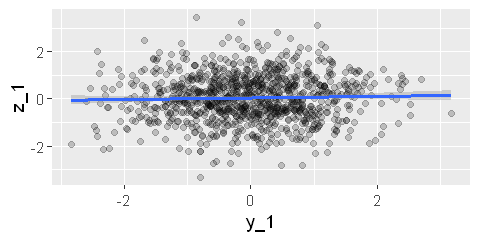

In [42]:
reg2 <- lm(y_1 ~ z_1)
summary(reg2)

df <- data.frame(y_1, z_1)

ggplot(df, aes(y_1, z_1)) + 
    geom_point(alpha=0.2) + 
    geom_smooth(method = "lm")